<a href="https://colab.research.google.com/github/Murakami-Shoya/everyday_programming/blob/master/py_for_finance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 5章 pandas

In [ ]:
# ndarrayからdfに変換
import numpy as np
import pandas as pd


np.random.seed(100)

a = np.random.standard_normal((9, 4))
a

array([[-1.74976547,  0.3426804 ,  1.1530358 , -0.25243604],
       [ 0.98132079,  0.51421884,  0.22117967, -1.07004333],
       [-0.18949583,  0.25500144, -0.45802699,  0.43516349],
       [-0.58359505,  0.81684707,  0.67272081, -0.10441114],
       [-0.53128038,  1.02973269, -0.43813562, -1.11831825],
       [ 1.61898166,  1.54160517, -0.25187914, -0.84243574],
       [ 0.18451869,  0.9370822 ,  0.73100034,  1.36155613],
       [-0.32623806,  0.05567601,  0.22239961, -1.443217  ],
       [-0.75635231,  0.81645401,  0.75044476, -0.45594693]])

In [ ]:
df = pd.DataFrame(a)
df

,0,1,2,3
0,-1.749765,0.342680,1.153036,-0.252436
1,0.981321,0.514219,0.221180,-1.070043
2,-0.189496,0.255001,-0.458027,0.435163
3,-0.583595,0.816847,0.672721,-0.104411
4,-0.531280,1.029733,-0.438136,-1.118318
5,1.618982,1.541605,-0.251879,-0.842436
6,0.184519,0.937082,0.731000,1.361556
7,-0.326238,0.055676,0.222400,-1.443217
8,-0.756352,0.816454,0.750445,-0.455947


In [ ]:
df.columns = ['No1', 'No2', 'No3', 'No4']
df

,No1,No2,No3,No4
0,-1.749765,0.342680,1.153036,-0.252436
1,0.981321,0.514219,0.221180,-1.070043
2,-0.189496,0.255001,-0.458027,0.435163
3,-0.583595,0.816847,0.672721,-0.104411
4,-0.531280,1.029733,-0.438136,-1.118318
5,1.618982,1.541605,-0.251879,-0.842436
6,0.184519,0.937082,0.731000,1.361556
7,-0.326238,0.055676,0.222400,-1.443217
8,-0.756352,0.816454,0.750445,-0.455947


In [ ]:
# 金融時系列データを扱うための時間インデックス

dates = pd.date_range('2019-1-1', periods=9, freq='M') # 9期間、M：月末ごと
dates

DatetimeIndex(['2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30',
               '2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31',
               '2019-09-30'],
              dtype='datetime64[ns]', freq='M')

In [ ]:
df.index = dates
df

,No1,No2,No3,No4,Quarter,Odd_Even
2019-01-31,-1.749765,0.342680,1.153036,-0.252436,Q1,Odd
2019-02-28,0.981321,0.514219,0.221180,-1.070043,Q1,Even
2019-03-31,-0.189496,0.255001,-0.458027,0.435163,Q1,Odd
2019-04-30,-0.583595,0.816847,0.672721,-0.104411,Q2,Even
2019-05-31,-0.531280,1.029733,-0.438136,-1.118318,Q2,Odd
2019-06-30,1.618982,1.541605,-0.251879,-0.842436,Q2,Even
2019-07-31,0.184519,0.937082,0.731000,1.361556,Q3,Odd
2019-08-31,-0.326238,0.055676,0.222400,-1.443217,Q3,Even
2019-09-30,-0.756352,0.816454,0.750445,-0.455947,Q3,Odd


In [ ]:
# 基本的な分析

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9 entries, 2019-01-31 to 2019-09-30
Freq: M
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No1     9 non-null      float64
 1   No2     9 non-null      float64
 2   No3     9 non-null      float64
 3   No4     9 non-null      float64
dtypes: float64(4)
memory usage: 360.0 bytes


In [ ]:
df.describe()

,No1,No2,No3,No4
count,9.000000,9.000000,9.000000,9.000000
mean,-0.150212,0.701033,0.289193,-0.387788
std,0.988306,0.457685,0.579920,0.877532
min,-1.749765,0.055676,-0.458027,-1.443217
25%,-0.583595,0.342680,-0.251879,-1.070043
50%,-0.326238,0.816454,0.222400,-0.455947
75%,0.184519,0.937082,0.731000,-0.104411
max,1.618982,1.541605,1.153036,1.361556


In [ ]:
df.sum()

No1   -1.351906
No2    6.309298
No3    2.602739
No4   -3.490089
dtype: float64

In [ ]:
df.mean()

No1   -0.150212
No2    0.701033
No3    0.289193
No4   -0.387788
dtype: float64

In [ ]:
df.mean(axis=1)

2019-01-31   -0.126621
2019-02-28    0.161669
2019-03-31    0.010661
2019-04-30    0.200390
2019-05-31   -0.264500
2019-06-30    0.516568
2019-07-31    0.803539
2019-08-31   -0.372845
2019-09-30    0.088650
Freq: M, dtype: float64

In [ ]:
np.log(df)

,No1,No2,No3,No4
2019-01-31,NaN,-1.070957,0.142398,NaN
2019-02-28,-0.018856,-0.665106,-1.508780,NaN
2019-03-31,NaN,-1.366486,NaN,-0.832033
2019-04-30,NaN,-0.202303,-0.396425,NaN
2019-05-31,NaN,0.029299,NaN,NaN
2019-06-30,0.481797,0.432824,NaN,NaN
2019-07-31,-1.690005,-0.064984,-0.313341,0.308628
2019-08-31,NaN,-2.888206,-1.503279,NaN
2019-09-30,NaN,-0.202785,-0.287089,NaN


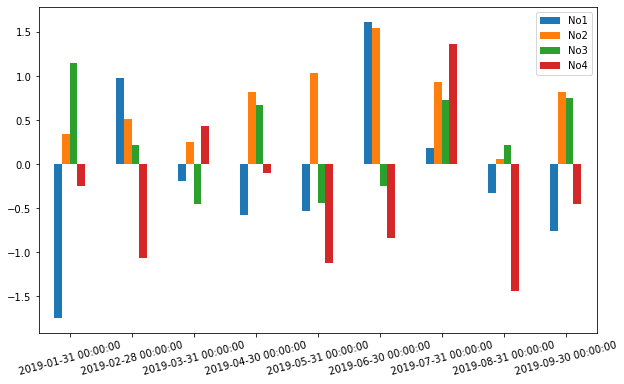

In [ ]:
# matplotlibのラッパーを提供する

df.plot.bar(figsize=(10, 6), rot=15)

In [ ]:
# Seriesクラス

# Ⅰ列のデータしかない

S = pd.Series(np.linspace(0, 15, 7), name='series')
S

0     0.0
1     2.5
2     5.0
3     7.5
4    10.0
5    12.5
6    15.0
Name: series, dtype: float64

In [ ]:
type(df['No1'])

pandas.core.series.Series

In [ ]:
# GroupBy演算
# GroupByオブジェクトになる

df['Quarter'] = ['Q1', 'Q1', 'Q1','Q2', 'Q2', 'Q2','Q3', 'Q3', 'Q3',]
df

,No1,No2,No3,No4,Quarter
2019-01-31,-1.749765,0.342680,1.153036,-0.252436,Q1
2019-02-28,0.981321,0.514219,0.221180,-1.070043,Q1
2019-03-31,-0.189496,0.255001,-0.458027,0.435163,Q1
2019-04-30,-0.583595,0.816847,0.672721,-0.104411,Q2
2019-05-31,-0.531280,1.029733,-0.438136,-1.118318,Q2
2019-06-30,1.618982,1.541605,-0.251879,-0.842436,Q2
2019-07-31,0.184519,0.937082,0.731000,1.361556,Q3
2019-08-31,-0.326238,0.055676,0.222400,-1.443217,Q3
2019-09-30,-0.756352,0.816454,0.750445,-0.455947,Q3


In [ ]:
groups = df.groupby('Quarter')
groups.size()

Quarter
Q1    3
Q2    3
Q3    3
dtype: int64

In [ ]:
groups.mean()

,No1,No2,No3,No4
Quarter,,,,
Q1,-0.319314,0.370634,0.305396,-0.295772
Q2,0.168035,1.129395,-0.005765,-0.688388
Q3,-0.299357,0.603071,0.567948,-0.179203


In [ ]:
# 複数列のグループ化

df['Odd_Even'] = ['Odd', 'Even', 'Odd', 'Even', 'Odd', 'Even', 'Odd', 'Even', 'Odd']
groups = df.groupby(['Quarter', 'Odd_Even'])
groups.size()

Quarter  Odd_Even
Q1       Even        1
         Odd         2
Q2       Even        2
         Odd         1
Q3       Even        1
         Odd         2
dtype: int64

In [ ]:
df[df['No1'] > 0]

,No1,No2,No3,No4,Quarter,Odd_Even
2019-02-28,0.981321,0.514219,0.221180,-1.070043,Q1,Even
2019-06-30,1.618982,1.541605,-0.251879,-0.842436,Q2,Even
2019-07-31,0.184519,0.937082,0.731000,1.361556,Q3,Odd


In [ ]:
# df.query('No1 > 0')

,No1,No2,No3,No4,Quarter,Odd_Even
2019-02-28,0.981321,0.514219,0.221180,-1.070043,Q1,Even
2019-06-30,1.618982,1.541605,-0.251879,-0.842436,Q2,Even
2019-07-31,0.184519,0.937082,0.731000,1.361556,Q3,Odd


In [ ]:
df[df > 0]

,No1,No2,No3,No4
0,NaN,0.342680,1.153036,NaN
1,0.981321,0.514219,0.221180,NaN
2,NaN,0.255001,NaN,0.435163
3,NaN,0.816847,0.672721,NaN
4,NaN,1.029733,NaN,NaN
5,1.618982,1.541605,NaN,NaN
6,0.184519,0.937082,0.731000,1.361556
7,NaN,0.055676,0.222400,NaN
8,NaN,0.816454,0.750445,NaN


In [ ]:
# 連結
df1 = pd.DataFrame(['100', '200', '300', '400'],
                     index=['a', 'b', 'c', 'd'],
                     columns=['A',])

df1

,A
a,100
b,200
c,300
d,400


In [ ]:
df2 = pd.DataFrame(['200', '150', '50'],
                     index=['f', 'b', 'd'],
                     columns=['B',])
df2

,B
f,200
b,150
d,50


In [ ]:
df1.append(df2, sort=False)

,A,B
a,100,NaN
b,200,NaN
c,300,NaN
d,400,NaN
f,NaN,200
b,NaN,150
d,NaN,50


In [ ]:
df1.append(df2, ignore_index=True, sort=False)

,A,B
0,100,NaN
1,200,NaN
2,300,NaN
3,400,NaN
4,NaN,200
5,NaN,150
6,NaN,50


In [ ]:
pd.concat((df1, df2), ignore_index=True, sort=False)

,A,B
0,100,NaN
1,200,NaN
2,300,NaN
3,400,NaN
4,NaN,200
5,NaN,150
6,NaN,50


In [ ]:
# 結合

df1.join(df2)

,A,B
a,100,NaN
b,200,150
c,300,NaN
d,400,50


In [ ]:
df2.join(df1)

,B,A
f,200,NaN
b,150,200
d,50,400


In [ ]:
# left
# right
# inner ... 両方のインデックスに共通するインデックスだけ保持
print(df1.join(df2, how='inner'))
# outer ... 両方のインデックスすべてを保持
df1.join(df2, how='outer')

     A    B
b  200  150
d  400   50


,A,B
a,100,NaN
b,200,150
c,300,NaN
d,400,50
f,NaN,200


In [ ]:
# マージ
# 結合との違いは共通の列に対する処理であること

c = pd.Series([250, 150, 50], index=['b', 'd', 'c'])
df1['C'] = c
df2['C'] = c

print(df1)
print(df2)

     A      C
a  100    NaN
b  200  250.0
c  300   50.0
d  400  150.0
     B      C
f  200    NaN
b  150  250.0
d   50  150.0


In [ ]:
pd.merge(df1, df2)

,A,C,B
0,100,NaN,200
1,200,250.0,150
2,400,150.0,50


In [ ]:
pd.merge(df1, df2, left_index=True, right_index=True)

,A,C_x,B,C_y
b,200,250.0,150,250.0
d,400,150.0,50,150.0


### 性能
ndarrayでの演算のほうが高速

ndarraysでは扱うことのできない欠損データを扱うことができる

# 第3部 金融データサイエンス

## 7章データ可視化

* 折れ線 … plot
* 棒グラフ … bar
* 散布図 … scatter
* ヒストグラム … hist
* 箱ひげ図 … boxplot

In [14]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(1000)
plt.style.use('seaborn')
%matplotlib inline

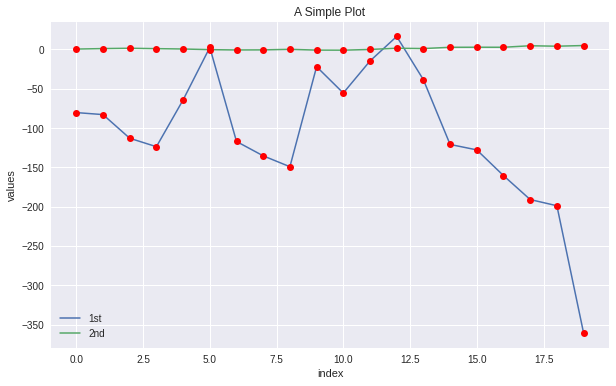

In [15]:
y = np.random.standard_normal((20, 2)).cumsum(axis=0)
y[:, 0] = y[:, 0] * 100

plt.figure(figsize=(10, 6))
plt.plot(y[:, 0], lw=1.5, label='1st')
plt.plot(y[:, 1], lw=1.5, label='2nd')
plt.plot(y, 'ro')
plt.legend(loc=0)
plt.xlabel('index')
plt.ylabel('values')
plt.title('A Simple Plot')
plt.show()

Text(0, 0.5, 'values 2nd')

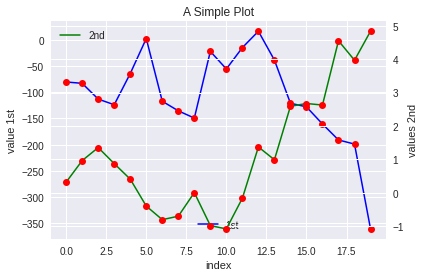

In [16]:
# 第2軸の定義

fig, ax1 = plt.subplots()
plt.plot(y[:, 0], 'b', lw=1.5, label='1st')
plt.plot(y[:, 0], 'ro')
plt.legend(loc=8)
plt.xlabel('index')
plt.ylabel('value 1st')
plt.title('A Simple Plot')

ax2 = ax1.twinx()   # x軸を共有する第2軸オブジェクト
plt.plot(y[:, 1], 'g', lw=1.5, label='2nd')
plt.plot(y[:, 1], 'ro')
plt.legend(loc=0)
plt.ylabel('values 2nd')

Text(0, 0.5, 'values 2nd')

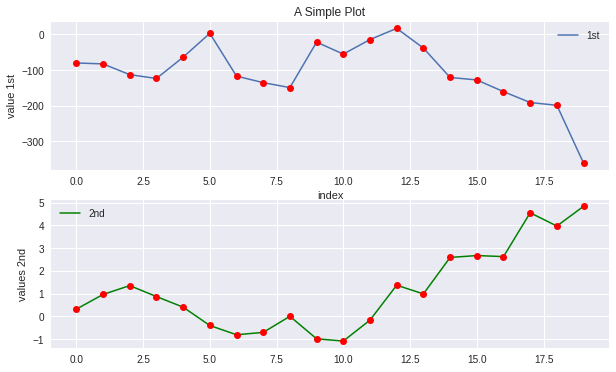

In [17]:
# 別々

plt.figure(figsize=(10, 6))
plt.subplot(211)    # 引数は(numrows, numcols, fignum)
plt.plot(y[:, 0], lw=1.5, label='1st')
plt.plot(y[:, 0], 'ro')
plt.legend(loc=0)
plt.xlabel('index')
plt.ylabel('value 1st')
plt.title('A Simple Plot')

plt.subplot(212)
plt.plot(y[:, 1], 'g', lw=1.5, label='2nd')
plt.plot(y[:, 1], 'ro')
plt.legend(loc=0)
plt.ylabel('values 2nd')

### ヒストグラム重要

Text(0.5, 1.0, 'Histogram')

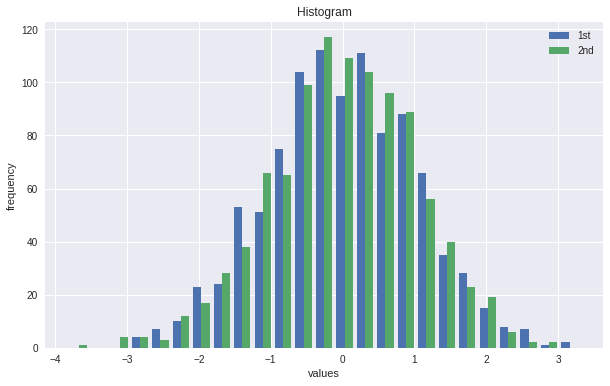

In [19]:
# 2つのデータ
y = np.random.standard_normal((1000, 2))

plt.figure(figsize=(10, 6))
plt.hist(y, label=['1st', '2nd'], bins=25)
plt.legend(loc=0)
plt.xlabel('values')
plt.ylabel('frequency')
plt.title('Histogram')

Text(0.5, 1.0, 'Histogram')

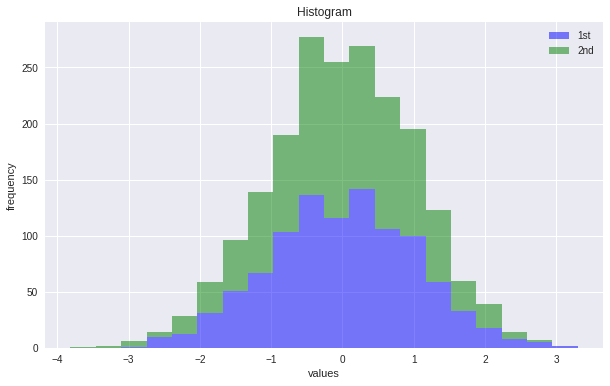

In [21]:
# 積み上げ棒グラフ
plt.figure(figsize=(10, 6))
plt.hist(y, label=['1st', '2nd'], color=['b', 'g'], stacked=True, bins=20, alpha=0.5)
plt.legend(loc=0)
plt.xlabel('values')
plt.ylabel('frequency')
plt.title('Histogram')

Text(0.5, 1.0, 'Boxplot')

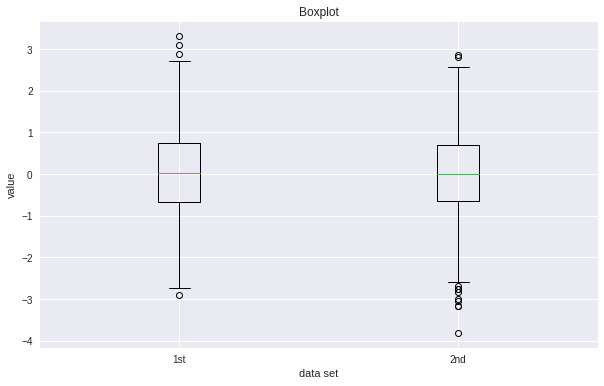

In [20]:
# 箱ひげ図(boxplot)
fig, ax = plt.subplots(figsize=(10, 6))
plt.boxplot(y)
plt.setp(ax, xticklabels=['1st', '2nd'])
plt.xlabel('data set')
plt.ylabel('value')
plt.title('Boxplot')

### Plotly

In [73]:
import pandas as pd
import numpy as np
import cufflinks as cf
import plotly.offline as plyo
# plyo.init_notebook_mode(connected=True)
import plotly.io as pio
pio.renderers.default = "colab"

In [24]:
a = np.random.standard_normal((250, 5)).cumsum(axis=0)
index = pd.date_range('2019-1-1',
                      freq='B',
                      periods=len(a))
df = pd.DataFrame(100 + 5 * a,
                  columns=list('abcde'),
                  index=index)
df

,a,b,c,d,e
2019-01-01,98.491410,98.463374,109.537882,106.757704,102.672234
2019-01-02,93.838172,93.965073,105.709611,109.471616,99.521080
2019-01-03,101.781626,97.204236,108.815307,108.708152,88.814788
2019-01-04,96.872135,92.458272,111.569972,97.604618,100.710434
2019-01-07,98.360720,94.762193,109.768495,102.449455,100.700320
...,...,...,...,...,...
2019-12-10,206.376776,99.203457,109.091851,13.378036,102.332323
2019-12-11,206.556992,99.240279,113.609500,13.210336,100.612087
2019-12-12,212.649083,105.758098,105.064361,14.641859,107.691932
2019-12-13,213.340016,107.293112,110.895221,14.231067,107.745994


In [31]:
plyo.iplot(
    df.iplot(asFigure=True),
    # image='png',
    # filename='ply_01'
)

In [32]:
plyo.iplot(
    df.iplot(kind='hist',
             subplots=True,
             bins=15,
             asFigure=True)
)

## 8章 金融時系列データ

In [11]:
raw = pd.read_csv('/content/bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv')
raw.Timestamp = pd.to_datetime(raw.Timestamp, unit='s')

raw.index = raw.Timestamp
raw.drop('Timestamp', inplace=True, axis=1)

raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1977391 entries, 2011-12-31 07:52:00 to 2015-10-09 00:14:00
Data columns (total 7 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Open               float64
 1   High               float64
 2   Low                float64
 3   Close              float64
 4   Volume_(BTC)       float64
 5   Volume_(Currency)  float64
 6   Weighted_Price     float64
dtypes: float64(7)
memory usage: 120.7 MB


In [12]:
quotes = raw[['Open', 'High', 'Low', 'Close']]
quotes = quotes.iloc[-60:]
quotes.tail()

,Open,High,Low,Close
Timestamp,,,,
2015-10-09 00:10:00,242.86,242.86,242.52,242.52
2015-10-09 00:11:00,242.95,242.95,242.70,242.70
2015-10-09 00:12:00,242.75,242.75,242.50,242.50
2015-10-09 00:13:00,242.51,242.88,242.51,242.88
2015-10-09 00:14:00,242.78,242.91,NaN,NaN


In [41]:
qf = cf.QuantFig(
    quotes,
    title='Bitcoin Exchange Rate',
    legend='top',
    name='bitcoin'
)
plyo.iplot(
    qf.iplot(asFigure=True)
)

In [43]:
qf.add_bollinger_bands(periods=5,
                       boll_std=2)
plyo.iplot(
    qf.iplot(asFigure=True)
)

In [44]:
qf.add_rsi(periods=5,
           showbands=False)
plyo.iplot(
    qf.iplot(asFigure=True)
)

In [13]:
raw.pct_change().round(3).tail()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2015-10-09 00:10:00,-0.002,-0.002,-0.001,-0.001,-0.648,-0.648,-0.001
2015-10-09 00:11:00,0.000,0.000,0.001,0.001,-0.942,-0.942,0.000
2015-10-09 00:12:00,-0.001,-0.001,-0.001,-0.001,148.588,148.463,-0.001
2015-10-09 00:13:00,-0.001,0.001,0.000,0.002,-0.946,-0.946,0.001
2015-10-09 00:14:00,0.001,0.000,0.000,0.000,0.000,0.000,0.000


In [16]:
raw.resample('1m', label='right').last().head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2011-12-31,4.58,4.58,4.58,4.58,9.000000,41.220000,4.58
2012-01-31,5.30,5.30,5.30,5.30,1.000000,5.300000,5.30
2012-02-29,4.99,4.99,4.99,4.99,1.000000,4.990000,4.99
2012-03-31,4.90,4.90,4.90,4.90,4.393736,21.529304,4.90
2012-04-30,5.00,5.00,5.00,5.00,10.514000,52.570000,5.00


#### 8.2 ローリング統計

In [64]:
data = raw.resample('1h', label='right').last()
# data = raw.dropna()
data.tail()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,min,mean,std,max,median,ewma,SMA_s,SMA_l
Timestamp,,,,,,,,,,,,,,,
2015-10-08 21:00:00,243.43,243.86,243.43,243.86,4.295539,1047.489489,243.855219,243.29,243.842,0.324128,244.23,243.935,243.855788,NaN,NaN
2015-10-08 22:00:00,243.19,243.78,243.19,243.78,0.400053,97.407020,243.485039,NaN,NaN,NaN,NaN,NaN,243.772461,NaN,NaN
2015-10-08 23:00:00,243.25,243.25,243.25,243.25,0.420000,102.165000,243.250000,NaN,NaN,NaN,NaN,NaN,243.278232,NaN,NaN
2015-10-09 00:00:00,242.90,242.90,242.90,242.90,0.575438,139.773992,242.900000,NaN,NaN,NaN,NaN,NaN,242.918535,NaN,NaN
2015-10-09 01:00:00,242.78,242.91,242.51,242.88,5.248462,1273.914464,242.721491,NaN,NaN,NaN,NaN,NaN,242.795990,NaN,NaN


In [65]:
window = 20
data['min'] = data['Close'].rolling(window=window).min()
data['mean'] = data['Close'].rolling(window=window).mean()
data['std'] = data['Close'].rolling(window=window).std()
data['max'] = data['Close'].rolling(window=window).max()
data['median'] = data['Close'].rolling(window=window).median()
data['ewma'] = data['Close'].ewm(halflife=0.5, min_periods=window).mean()
data.dropna()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,min,mean,std,max,median,ewma,SMA_s,SMA_l
Timestamp,,,,,,,,,,,,,,,
2013-04-10 22:00:00,153.01,153.01,152.85,152.85,22.020328,3369.269995,153.007256,130.00,214.3880,37.489713,257.70,227.495,155.872820,165.055000,146.108968
2013-04-10 23:00:00,152.00,152.00,148.78,148.78,9.470155,1416.337828,149.558048,130.00,210.7155,40.181994,257.70,227.495,150.553205,149.982619,150.185198
2013-04-11 00:00:00,161.00,162.00,161.00,162.00,37.612136,6078.968596,161.622532,130.00,207.5835,41.460432,257.70,227.495,159.138301,155.164524,149.181548
2013-04-11 13:00:00,144.06,144.06,144.00,144.06,125.382841,18055.572781,144.003538,130.00,158.5850,13.758612,178.10,160.000,146.690032,149.674762,145.704563
2013-04-11 14:00:00,114.00,115.00,113.50,114.11,49.760175,5674.939062,114.045801,114.11,156.8005,16.911300,178.10,160.000,122.255008,124.597143,144.969325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-02-01 21:00:00,226.50,226.50,226.36,226.36,8.972151,2031.482454,226.420896,213.53,218.7395,4.102721,228.00,218.510,226.477400,227.970952,223.586190
2015-07-06 17:00:00,273.22,273.72,272.99,273.26,50.384732,13777.816256,273.452211,267.59,271.5740,2.590120,277.12,271.140,274.109648,272.645000,275.254246
2015-07-06 18:00:00,272.22,272.22,272.22,272.22,4.604838,1253.529115,272.220000,267.59,271.6460,2.586899,277.12,271.625,272.692412,272.970714,274.606786


<AxesSubplot:xlabel='Timestamp'>

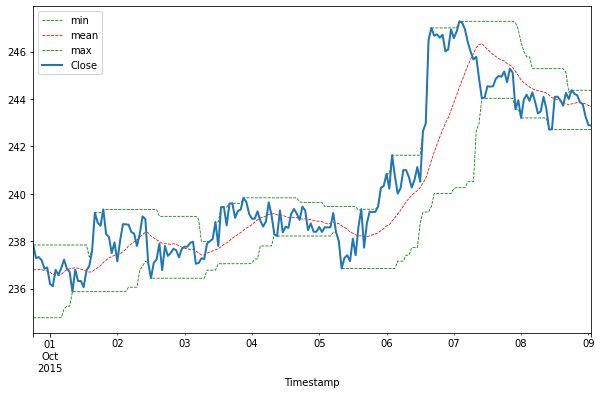

In [66]:
ax = data[['min', 'mean', 'max']].iloc[-200:].plot(
    figsize=(10, 6), style=['g--', 'r--', 'g--'], lw=0.8)
data[['Close']].iloc[-200:].plot(ax=ax, lw=2.0)

In [69]:
data[['Close', 'SMA_s', 'SMA_l']][:10]

,Close,SMA_s,SMA_l
Timestamp,,,
2011-12-31 08:00:00,4.39,NaN,NaN
2011-12-31 09:00:00,NaN,NaN,NaN
2011-12-31 10:00:00,NaN,NaN,NaN
2011-12-31 11:00:00,NaN,NaN,NaN
2011-12-31 12:00:00,NaN,NaN,NaN
2011-12-31 13:00:00,NaN,NaN,NaN
2011-12-31 14:00:00,NaN,NaN,NaN
2011-12-31 15:00:00,NaN,NaN,NaN
2011-12-31 16:00:00,4.39,NaN,NaN


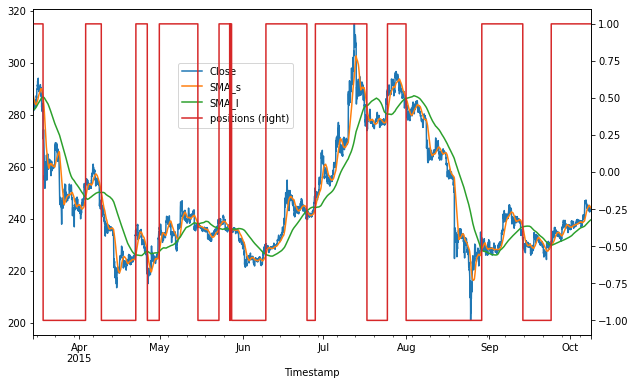

In [80]:
#  短期SMA(s)が長期SMA(l)を上回るならロング、下回るならショート
data['positions'] = np.where(data['SMA_s'] > data['SMA_l'], 1, -1)  #1:long, -1:short
data['SMA_s'] = data['Close'].rolling(window=42).mean()
data['SMA_l'] = data['Close'].rolling(window=252).mean()
# data[['Close', 'SMA_s', 'SMA_l']][-20000:].plot(figsize=(10, 6))
ax = data[['Close', 'SMA_s', 'SMA_l', 'positions']][-5000:].plot(figsize=(10, 6),
                                                        secondary_y = 'positions')
ax.get_legend().set_bbox_to_anchor((0.25, 0.85))